### Indice

- [Grafo](#Grafo)
- [Motif](#Motif)
- [Rinomina](#Rinomina)
- [Identify](#Identify)
- [Zippa](#Zippa)
- [Pipeline gerarchica multicompressione](#Pipeline-gerarchica-multicompressione)
- [Procedura frattale](#Procedura-frattale)
- [Memorizza merge](#Memorizza-merge)
- [Indici](#Indici)

In [3]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict
from pathlib import Path

In [4]:
import time

In [5]:
G1 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\eco-mangwet.edges')

G2 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\eco-foodweb-baydry.edges')

G3 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\eco-everglades.edges')

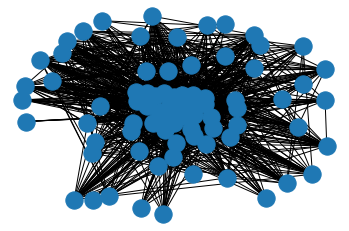

In [6]:
G1 = nx.read_weighted_edgelist(G1)
nx.draw_networkx(G1, with_labels=False)
plt.axis('off')
plt.show()

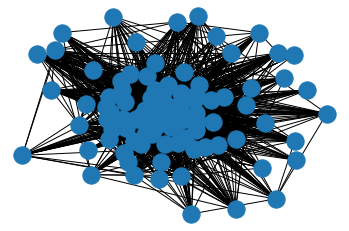

In [7]:
G2 = nx.read_weighted_edgelist(G2)
nx.draw_networkx(G2, with_labels=False)
plt.axis('off')
plt.show()

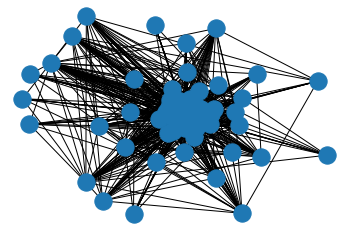

In [8]:
G3 = nx.read_weighted_edgelist(G3)
nx.draw_networkx(G3, with_labels=False)
plt.axis('off')
plt.show()

In [6]:
%load_ext pycodestyle_magic
# %%pycodestyle

### Grafo 
[torna su](#Indice)

Grafo test di base `G`

### Motif 
[torna su](#Indice)

Sottografo `motif`

In [9]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

### Rinomina 
[torna su](#Indice)

Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [10]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

### Identify
[torna su](#Indice)

Identify `motif` in `G`

In [11]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

### Zippa
[torna su](#Indice)

Restituisce il mapping per la compressione

In [12]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

### Pipeline gerarchica multicompressione
[torna su](#Indice)

_versione livelli misti, non frattale_

Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [11]:
G1 = rinomina(G1)

In [12]:
G2 = rinomina(G2)

In [13]:
G3 = rinomina(G3)

In [14]:
def multicoll(G, motif):
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = zippa(ris, nodi)
            print(mapping)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1

    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))
    

    return res


In [15]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)


# Rete 1

In [31]:
start_time = time.time()
res = multicoll(G1, motif)
print("--- %s seconds ---" % (time.time() - start_time))

{(0, '1'): (1, '1'), (0, '10'): (0, '10'), (0, '11'): (1, '1'), (0, '12'): (0, '12'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '18'): (0, '18'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '28'): (0, '28'), (0, '29'): (1, '1'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '37'): (0, '37'), (0, '38'): (0, '38'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '43'): (0, '43'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'),

{(1, '1'): (1, '1'), (1, '10'): (1, '10'), (1, '12'): (1, '12'), (1, '15'): (1, '15'), (0, '16'): (1, '16'), (0, '17'): (0, '17'), (0, '18'): (0, '18'), (0, '20'): (0, '20'), (0, '21'): (1, '16'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '28'): (0, '28'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (1, '16'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '37'): (0, '37'), (0, '38'): (0, '38'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '43'): (0, '43'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '51'): (0, '51'), (0, '52'): (0, '52'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '5

{(1, '1'): (1, '1'), (1, '10'): (1, '10'), (1, '12'): (1, '12'), (1, '15'): (1, '15'), (1, '16'): (1, '16'), (1, '17'): (1, '17'), (1, '18'): (1, '18'), (1, '20'): (1, '20'), (1, '22'): (1, '22'), (0, '25'): (1, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '3'): (0, '3'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '35'): (1, '25'), (0, '38'): (0, '38'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '44'): (0, '44'), (0, '45'): (1, '25'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '51'): (0, '51'), (0, '52'): (0, '52'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '58'), (0, '59'): (0, '59'), (0, '6'): (0, '6'), (0, '60'): (0, '60'), (0, '61'): (0, '61'), (0, '62'): (0, '62'), (0, '63'): (0, '63'), (0, '64'): (0, '64'), (0, '65'): (0, '65'), (0, '66'): (0, '66'), (0, '67'): (0, '67'

{(1, '1'): (1, '1'), (1, '10'): (1, '10'), (1, '12'): (1, '12'), (2, '15'): (2, '15'), (1, '16'): (1, '16'), (1, '17'): (1, '17'), (1, '18'): (1, '18'), (1, '20'): (1, '20'), (1, '22'): (1, '22'), (1, '25'): (1, '25'), (1, '26'): (1, '26'), (1, '27'): (1, '27'), (1, '32'): (1, '32'), (1, '38'): (1, '38'), (0, '40'): (1, '40'), (0, '41'): (0, '41'), (0, '47'): (0, '47'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (1, '40'), (0, '51'): (0, '51'), (0, '52'): (0, '52'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '57'): (1, '40'), (0, '58'): (0, '58'), (0, '6'): (0, '6'), (0, '60'): (0, '60'), (0, '61'): (0, '61'), (0, '62'): (0, '62'), (0, '63'): (0, '63'), (0, '64'): (0, '64'), (0, '65'): (0, '65'), (0, '66'): (0, '66'), (0, '67'): (0, '67'), (0, '68'): (0, '68'), (0, '69'): (0, '69'), (0, '7'): (0, '7'), (0, '70'): (0, '70'), (0, '71'): (0, '71'), (0, '72'): (0, '72'), (0, '73'): (0, '73'), (0, '74'): (0, '74'), (0, '75'): (0, '75'), (0, '76'): (0, '76'), (0, '77'): (0, '7

{(1, '1'): (1, '1'), (1, '10'): (1, '10'), (1, '12'): (1, '12'), (2, '15'): (2, '15'), (1, '16'): (1, '16'), (1, '17'): (1, '17'), (1, '18'): (1, '18'), (1, '20'): (1, '20'), (1, '22'): (1, '22'), (1, '25'): (1, '25'), (2, '26'): (2, '26'), (1, '27'): (1, '27'), (1, '32'): (1, '32'), (1, '38'): (1, '38'), (1, '40'): (1, '40'), (1, '41'): (1, '41'), (1, '47'): (1, '47'), (1, '49'): (1, '49'), (1, '51'): (1, '51'), (1, '52'): (1, '52'), (0, '53'): (1, '53'), (0, '6'): (0, '6'), (0, '62'): (1, '53'), (0, '65'): (0, '65'), (0, '66'): (0, '66'), (0, '67'): (0, '67'), (0, '68'): (0, '68'), (0, '69'): (0, '69'), (0, '7'): (0, '7'), (0, '70'): (0, '70'), (0, '72'): (0, '72'), (0, '73'): (0, '73'), (0, '74'): (0, '74'), (0, '75'): (0, '75'), (0, '76'): (0, '76'), (0, '77'): (0, '77'), (0, '78'): (0, '78'), (0, '79'): (0, '79'), (0, '80'): (0, '80'), (0, '81'): (0, '81'), (0, '82'): (0, '82'), (0, '83'): (0, '83'), (0, '84'): (0, '84'), (0, '85'): (0, '85'), (0, '86'): (0, '86'), (0, '87'): (0, 

{(2, '1'): (2, '1'), (2, '10'): (2, '10'), (2, '15'): (2, '15'), (2, '16'): (2, '16'), (1, '18'): (2, '18'), (1, '20'): (2, '18'), (1, '22'): (1, '22'), (1, '25'): (1, '25'), (2, '26'): (2, '26'), (1, '27'): (1, '27'), (1, '32'): (1, '32'), (1, '38'): (1, '38'), (2, '40'): (2, '40'), (2, '41'): (2, '41'), (2, '47'): (2, '47'), (1, '49'): (1, '49'), (1, '51'): (1, '51'), (1, '52'): (1, '52'), (1, '65'): (1, '65'), (1, '72'): (1, '72'), (0, '74'): (2, '18'), (0, '75'): (0, '75'), (0, '77'): (0, '77'), (0, '78'): (0, '78'), (0, '79'): (0, '79'), (0, '80'): (0, '80'), (0, '81'): (0, '81'), (0, '82'): (0, '82'), (0, '83'): (0, '83'), (0, '85'): (0, '85'), (0, '87'): (0, '87'), (0, '89'): (0, '89'), (0, '90'): (0, '90'), (0, '91'): (0, '91'), (0, '94'): (0, '94')}
{(2, '1'): (2, '1'), (2, '10'): (2, '10'), (2, '15'): (3, '15'), (2, '16'): (2, '16'), (2, '18'): (2, '18'), (1, '22'): (1, '22'), (1, '25'): (1, '25'), (2, '26'): (2, '26'), (1, '27'): (1, '27'), (1, '32'): (1, '32'), (1, '38'): (

In [32]:
res

[(0,
  (97,
   [(0, '1'),
    (0, '10'),
    (0, '11'),
    (0, '12'),
    (0, '13'),
    (0, '14'),
    (0, '15'),
    (0, '16'),
    (0, '17'),
    (0, '18'),
    (0, '19'),
    (0, '2'),
    (0, '20'),
    (0, '21'),
    (0, '22'),
    (0, '23'),
    (0, '24'),
    (0, '25'),
    (0, '26'),
    (0, '27'),
    (0, '28'),
    (0, '29'),
    (0, '3'),
    (0, '30'),
    (0, '31'),
    (0, '32'),
    (0, '33'),
    (0, '34'),
    (0, '35'),
    (0, '36'),
    (0, '37'),
    (0, '38'),
    (0, '39'),
    (0, '4'),
    (0, '40'),
    (0, '41'),
    (0, '42'),
    (0, '43'),
    (0, '44'),
    (0, '45'),
    (0, '46'),
    (0, '47'),
    (0, '48'),
    (0, '49'),
    (0, '5'),
    (0, '50'),
    (0, '51'),
    (0, '52'),
    (0, '53'),
    (0, '54'),
    (0, '55'),
    (0, '56'),
    (0, '57'),
    (0, '58'),
    (0, '59'),
    (0, '6'),
    (0, '60'),
    (0, '61'),
    (0, '62'),
    (0, '63'),
    (0, '64'),
    (0, '65'),
    (0, '66'),
    (0, '67'),
    (0, '68'),
    (0, '69'),
    

In [33]:
# res = multicoll(G0, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2, 3, 4, 5, 6] 
# nodi:  [97, 69, 33, 23, 5, 3, 1] 
Nodi:  [[(0, '1'), (0, '10'), (0, '11'), (0, '12'), (0, '13'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '60'), (0, '61'), (0, '62'), (0, '63'), (0, '64'), (0, '65'), (0, '66'), (0, '67'), (0, '68'), (0, '69'), (0, '7'), (0, '70'), (0, '71'), (0, '72'), (0, '73'), (0, '74'), (0, '75'), (0, '76'), (0, '77'), (0, '78'), (0, '79'), (0, '8'), (0, '80'), (0, '81'), (0, '82'), (0, '83'), (0, '84'), (0, '85'), (0, '8

In [34]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\n\n")

Livello:  0 
# nodi:  97 
Nodi:  [(0, '1'), (0, '10'), (0, '11'), (0, '12'), (0, '13'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '60'), (0, '61'), (0, '62'), (0, '63'), (0, '64'), (0, '65'), (0, '66'), (0, '67'), (0, '68'), (0, '69'), (0, '7'), (0, '70'), (0, '71'), (0, '72'), (0, '73'), (0, '74'), (0, '75'), (0, '76'), (0, '77'), (0, '78'), (0, '79'), (0, '8'), (0, '80'), (0, '81'), (0, '82'), (0, '83'), (0, '84'), (0, '85'), (0, '86'), (0, '87'), (0, '88'), (0, '89'), (0, '9

[((0, '95'), (0, '1')), ((0, '95'), (0, '2')), ((0, '95'), (0, '3')), ((0, '95'), (0, '4')), ((0, '95'), (0, '5')), ((0, '95'), (0, '12')), ((0, '95'), (0, '60')), ((0, '95'), (0, '61')), ((0, '95'), (0, '62')), ((0, '95'), (0, '63')), ((0, '95'), (0, '64')), ((0, '95'), (0, '65')), ((0, '95'), (0, '66')), ((0, '95'), (0, '67')), ((0, '95'), (0, '68')), ((0, '95'), (0, '69')), ((0, '95'), (0, '70')), ((0, '95'), (0, '71')), ((0, '95'), (0, '72')), ((0, '95'), (0, '73')), ((0, '95'), (0, '74')), ((0, '95'), (0, '75')), ((0, '95'), (0, '76')), ((0, '95'), (0, '77')), ((0, '95'), (0, '78')), ((0, '95'), (0, '79')), ((0, '95'), (0, '93')), ((0, '95'), (0, '94')), ((0, '1'), (0, '96')), ((0, '1'), (0, '97')), ((0, '1'), (0, '6')), ((0, '1'), (0, '7')), ((0, '1'), (0, '11')), ((0, '1'), (0, '12')), ((0, '1'), (0, '13')), ((0, '1'), (0, '17')), ((0, '1'), (0, '29')), ((0, '1'), (0, '30')), ((0, '1'), (0, '39')), ((0, '1'), (0, '40')), ((0, '1'), (0, '45')), ((0, '1'), (0, '92')), ((0, '1'), (

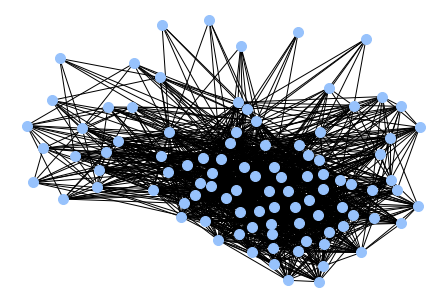

[((0, '95'), (1, '1')), ((0, '95'), (1, '15')), ((0, '95'), (1, '26')), ((0, '95'), (0, '4')), ((0, '95'), (0, '5')), ((0, '95'), (1, '12')), ((0, '95'), (0, '60')), ((0, '95'), (0, '61')), ((0, '95'), (0, '62')), ((0, '95'), (0, '63')), ((0, '95'), (0, '64')), ((0, '95'), (0, '65')), ((0, '95'), (0, '66')), ((0, '95'), (0, '67')), ((0, '95'), (0, '68')), ((0, '95'), (0, '69')), ((0, '95'), (0, '70')), ((0, '95'), (0, '71')), ((0, '95'), (0, '72')), ((0, '95'), (0, '73')), ((0, '95'), (0, '74')), ((0, '95'), (0, '75')), ((0, '95'), (0, '76')), ((0, '95'), (0, '77')), ((0, '95'), (0, '78')), ((0, '95'), (0, '79')), ((0, '95'), (0, '93')), ((0, '95'), (0, '94')), ((1, '1'), (0, '96')), ((1, '1'), (0, '97')), ((1, '1'), (0, '6')), ((1, '1'), (0, '7')), ((1, '1'), (1, '1')), ((1, '1'), (1, '12')), ((1, '1'), (1, '17')), ((1, '1'), (1, '22')), ((1, '1'), (1, '18')), ((1, '1'), (0, '40')), ((1, '1'), (1, '25')), ((1, '1'), (0, '92')), ((1, '1'), (0, '94')), ((1, '1'), (1, '15')), ((1, '1'), 

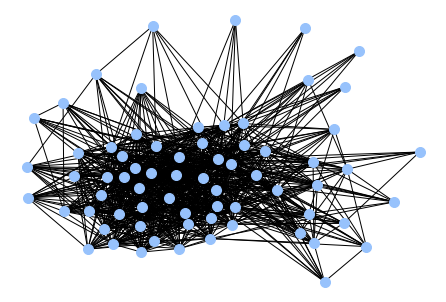

[((2, '26'), (2, '1')), ((2, '26'), (2, '15')), ((2, '26'), (2, '26')), ((2, '26'), (2, '10')), ((2, '26'), (2, '41')), ((2, '26'), (1, '51')), ((2, '26'), (2, '47')), ((2, '26'), (1, '49')), ((2, '26'), (1, '65')), ((2, '26'), (2, '40')), ((2, '26'), (1, '72')), ((2, '26'), (2, '16')), ((2, '26'), (2, '18')), ((2, '26'), (0, '75')), ((2, '26'), (0, '77')), ((2, '26'), (0, '78')), ((2, '26'), (0, '79')), ((2, '26'), (0, '94')), ((2, '26'), (0, '82')), ((2, '26'), (0, '89')), ((2, '26'), (1, '25')), ((2, '26'), (1, '27')), ((2, '26'), (0, '83')), ((2, '26'), (0, '87')), ((2, '26'), (0, '91')), ((2, '26'), (1, '32')), ((2, '26'), (1, '38')), ((2, '26'), (0, '80')), ((2, '26'), (0, '85')), ((2, '1'), (1, '65')), ((2, '1'), (2, '41')), ((2, '1'), (2, '1')), ((2, '1'), (2, '10')), ((2, '1'), (2, '16')), ((2, '1'), (1, '22')), ((2, '1'), (2, '18')), ((2, '1'), (2, '40')), ((2, '1'), (1, '25')), ((2, '1'), (2, '15')), ((2, '1'), (0, '94')), ((2, '1'), (2, '47')), ((2, '1'), (1, '49')), ((2, '

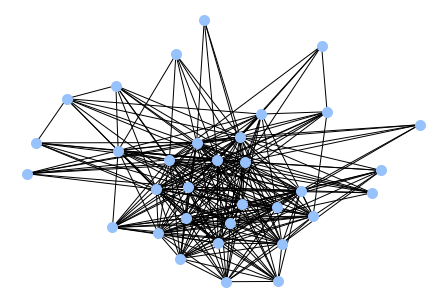

[((3, '26'), (2, '1')), ((3, '26'), (3, '15')), ((3, '26'), (3, '26')), ((3, '26'), (2, '10')), ((3, '26'), (3, '41')), ((3, '26'), (2, '47')), ((3, '26'), (1, '49')), ((3, '26'), (3, '32')), ((3, '26'), (2, '16')), ((3, '26'), (2, '18')), ((3, '26'), (0, '94')), ((3, '26'), (0, '82')), ((3, '26'), (0, '89')), ((3, '26'), (1, '25')), ((3, '26'), (1, '27')), ((3, '26'), (0, '83')), ((3, '26'), (0, '87')), ((3, '26'), (0, '91')), ((3, '26'), (1, '38')), ((3, '26'), (0, '85')), ((2, '1'), (3, '15')), ((2, '1'), (3, '41')), ((2, '1'), (2, '1')), ((2, '1'), (2, '10')), ((2, '1'), (2, '16')), ((2, '1'), (1, '22')), ((2, '1'), (2, '18')), ((2, '1'), (3, '32')), ((2, '1'), (1, '25')), ((2, '1'), (0, '94')), ((2, '1'), (2, '47')), ((2, '1'), (1, '49')), ((2, '1'), (1, '52')), ((2, '1'), (1, '27')), ((2, '1'), (0, '83')), ((2, '1'), (0, '87')), ((2, '1'), (1, '38')), ((3, '15'), (3, '15')), ((3, '15'), (3, '41')), ((3, '15'), (1, '52')), ((3, '15'), (2, '10')), ((3, '15'), (2, '16')), ((3, '15')

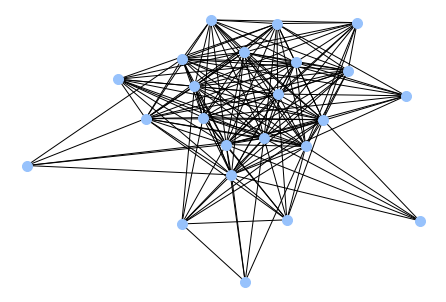

[((4, '25'), (4, '1')), ((4, '25'), (4, '15')), ((4, '25'), (4, '25')), ((4, '25'), (3, '41')), ((4, '25'), (4, '18')), ((4, '1'), (4, '15')), ((4, '1'), (3, '41')), ((4, '1'), (4, '1')), ((4, '1'), (4, '18')), ((4, '15'), (4, '15')), ((4, '15'), (3, '41')), ((4, '15'), (4, '18')), ((3, '41'), (3, '41')), ((3, '41'), (4, '18')), ((4, '18'), (4, '18'))]


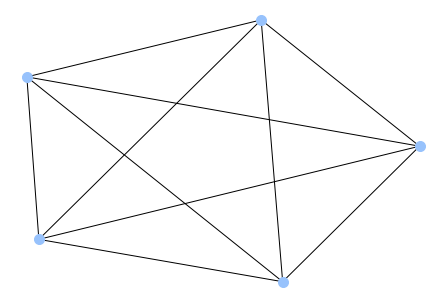

[((4, '25'), (5, '1')), ((4, '25'), (4, '25')), ((4, '25'), (4, '18')), ((5, '1'), (5, '1')), ((5, '1'), (4, '18')), ((4, '18'), (4, '18'))]


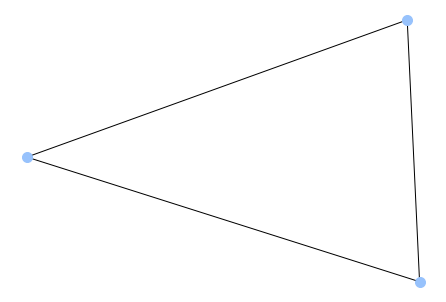

[((6, '1'), (6, '1'))]


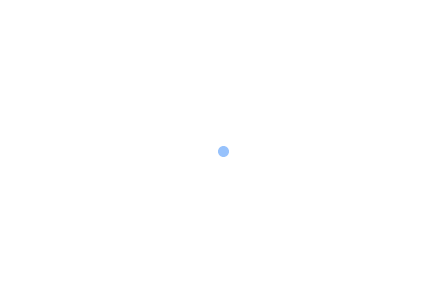

In [37]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    #nx.draw(GG)
    nx.draw(GG, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')
    plt.pause(1)
    plt.show()

In [36]:
print("Rete 1: ", nodes_decrease(num_nodi))

Rete 1:  (96, 98.96907216494846, 1, 1.0309278350515427)


In [1]:
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

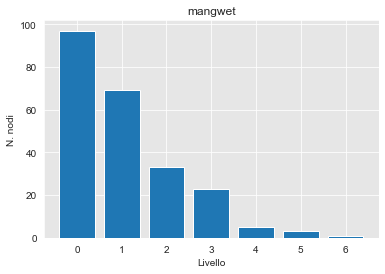

In [3]:
livelli = [0, 1, 2, 3, 4, 5, 6] 
nnodi = [97, 69, 33, 23, 5, 3, 1]   


plt.bar(livelli, nnodi)
plt.xlabel("Livello")
plt.ylabel("N. nodi")

plt.title("mangwet")
plt.savefig("livelliC3G1.png")

In [13]:
def multicoll(G, motif):
    m = []
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = zippa(ris, nodi)
            m.append(mapping)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1

    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))
    

    return m


def memo(mapping, n):
    dizz = dict()
    for u in mapping:
        
        value_occurrences = collections.Counter(u.values())
        filtered_dict = {key: value for key, value in u.items()
                         if value_occurrences[value] == n}
        new_list = []
        for i, j in filtered_dict.items():
            j = list(j)
            j = i
            j = tuple(j)
            new_list.append(j)
        a = [i for i in new_list[0]]
        a[0] = a[0]+1
        a = tuple(a)
        #print(a, new_list)
        dizz.update({a: new_list})
    return dizz

def flatten(lista):
    flat_list = []
    for sublist in lista:
        #print(type(sublist))
        if type(sublist) == tuple:
            flat_list.append(sublist)
        if type(sublist) == list:
            for item in sublist:
                flat_list.append(item)
    return flat_list

def all_equal(iterator):
    iterator = [x[0] for x in iterator]
    if len(set(iterator)) <= 1:
        ah = list(set(iterator))
        return ah[0] == 0
    else:
        return False
    
from itertools import product


def all_equal(iterator):
    iterator = [x[0] for x in iterator]
    if len(set(iterator)) <= 1:
        ah = list(set(iterator))
        return ah[0] == 0
    else:
        return False

def inverti(lista_nodi, mapping):
    risultato_nodi = []
    risultato_archi = []
    grafo_finale = nx.Graph()
    
    while mapping != {}:
        lista_nodi.sort(key=lambda x:x[0])
        x = lista_nodi[-1]
        y = mapping.get(x)
        risultato_archi.append(y)
        lista_nodi[lista_nodi.index(x)] = y

        del mapping[x]
        lista_nodi = flatten(lista_nodi)
        lista_nodi.sort(key=lambda x:x[1])
    risultato_nodi.append(lista_nodi)

    
    lista = []
    for i in risultato_nodi[0]:
        lista.append(i[1])
        
        
    lista_archi_final = [(lista[i], lista[i+1]) for i in range(0, len(lista)-1, 1)] 
    #print(lista_archi_final)
    
    grafo_finale.add_edges_from(lista_archi_final)
    #print("Risultato archi", risultato_archi)
    risultato_archi2 = []
    for i in risultato_archi:
        #print("i", i, all_equal(i))
        if all_equal(i) == True:
            risultato_archi2.append(i)
    #print(risultato_archi2)
    arconi = []
    for a in risultato_archi2:
        print(a, a[0][1], a[2][1])
        arconi.append((a[0][1], a[2][1]))
    print(arconi)
    grafo_finale.add_edges_from(arconi)

    
    return grafo_finale




## Rete 1 inversa

In [15]:
m1 = multicoll(G1, motif)
m1

IndexError: string index out of range

In [ ]:
mapping1 = memo(m1, 3)

G1_finale = 

G1_INV = inverti(G1_finale, mapping1)


nx.draw(G1_INV, node_color='#97C2FC', node_size=150, edge_color='black', node_shape='o')

---

# Rete 2

In [25]:
start_time = time.time()
res2 = multicoll(G2, motif)
print("--- %s seconds ---" % (time.time() - start_time))

{(0, '1'): (1, '1'), (0, '10'): (1, '1'), (0, '100'): (0, '100'), (0, '101'): (0, '101'), (0, '102'): (0, '102'), (0, '103'): (0, '103'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '18'): (1, '1'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (0, '102'): (1, '102'), (0, '103'): (0, '103'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '108'): (1, '102'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0,

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (0, '11'): (1, '11'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (1, '11'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (0, '12'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '31'): (0, '31'), (0, '32'): (0,

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (0, '116'): (1, '116'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '23'): (1, '116'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '

{(1, '1'): (1, '1'), (1, '100'): (1, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (1, '116'): (1, '116'), (1, '118'): (1, '118'), (1, '119'): (1, '119'), (1, '120'): (1, '120'), (0, '121'): (1, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '38'): (0, '3

{(2, '1'): (2, '1'), (1, '100'): (2, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (1, '116'): (1, '116'), (1, '118'): (1, '118'), (1, '119'): (1, '119'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '122'): (1, '122'), (1, '125'): (1, '125'), (0, '126'): (2, '100'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '29'): (2, '100'), (0, '3'): (0, '3'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '38'): (0, '38'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), 

{(4, '1'): (4, '1'), (2, '100'): (2, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (1, '103'): (1, '103'), (1, '104'): (1, '104'), (1, '105'): (1, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (1, '116'): (1, '116'), (1, '118'): (1, '118'), (1, '119'): (1, '119'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '122'): (1, '122'), (1, '125'): (1, '125'), (1, '127'): (1, '127'), (1, '16'): (1, '16'), (0, '17'): (1, '17'), (0, '2'): (0, '2'), (0, '20'): (1, '17'), (0, '24'): (1, '17'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '3'): (0, '3'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '38'): (0, '38'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50

{(4, '1'): (4, '1'), (2, '100'): (2, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (2, '103'): (2, '103'), (1, '104'): (1, '104'), (2, '105'): (2, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (1, '116'): (1, '116'), (1, '118'): (1, '118'), (1, '119'): (1, '119'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '122'): (1, '122'), (1, '125'): (1, '125'), (1, '127'): (1, '127'), (1, '16'): (1, '16'), (1, '17'): (1, '17'), (1, '2'): (1, '2'), (1, '26'): (1, '26'), (0, '3'): (1, '3'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '38'): (0, '38'), (0, '4'): (0, '4'), (0, '41'): (0, '41'), (0, '42'): (1, '3'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '5'): (0, '5'), (0, '51'): (0, '51'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '56'): (0, '56'), (0, '6'): (0, '6'), (0, '60'): (0, '60'), (0, '61'):

{(4, '1'): (4, '1'), (2, '100'): (2, '100'), (1, '101'): (1, '101'), (1, '102'): (1, '102'), (2, '103'): (2, '103'), (1, '104'): (1, '104'), (2, '105'): (2, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (1, '116'): (1, '116'), (1, '118'): (1, '118'), (1, '119'): (1, '119'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '122'): (1, '122'), (1, '125'): (2, '125'), (1, '127'): (1, '127'), (1, '16'): (1, '16'), (1, '17'): (1, '17'), (1, '2'): (1, '2'), (1, '26'): (1, '26'), (1, '3'): (1, '3'), (1, '33'): (1, '33'), (1, '34'): (1, '34'), (1, '35'): (1, '35'), (1, '36'): (1, '36'), (1, '38'): (1, '38'), (0, '4'): (2, '125'), (0, '41'): (0, '41'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (2, '125'), (0, '48'): (0, '48'), (0, '5'): (0, '5'), (0, '53'): (0, '53'), (0, '56'): (0, '56'), (0, '6'): (0, '6'), (0, '62'): (0, '62'), (0, '63'): (0, '63'), (0, '64'): (0, '64'), (0, '65'): (0, '65'), (0, '6

{(4, '1'): (4, '1'), (2, '100'): (2, '100'), (1, '101'): (1, '101'), (2, '102'): (2, '102'), (2, '103'): (2, '103'), (2, '104'): (2, '104'), (2, '105'): (2, '105'), (1, '11'): (1, '11'), (1, '112'): (1, '112'), (1, '113'): (1, '113'), (1, '115'): (1, '115'), (2, '116'): (2, '116'), (1, '118'): (1, '118'), (2, '119'): (2, '119'), (1, '120'): (1, '120'), (1, '121'): (1, '121'), (1, '122'): (1, '122'), (2, '125'): (2, '125'), (1, '127'): (1, '127'), (1, '16'): (1, '16'), (1, '17'): (1, '17'), (2, '2'): (2, '2'), (1, '26'): (1, '26'), (1, '3'): (1, '3'), (1, '33'): (1, '33'), (1, '34'): (1, '34'), (1, '35'): (1, '35'), (2, '36'): (2, '36'), (1, '38'): (2, '38'), (1, '44'): (1, '44'), (0, '6'): (2, '38'), (0, '65'): (0, '65'), (0, '66'): (0, '66'), (0, '67'): (0, '67'), (0, '7'): (0, '7'), (0, '70'): (0, '70'), (0, '8'): (0, '8'), (0, '83'): (0, '83'), (0, '89'): (0, '89'), (0, '9'): (0, '9'), (0, '93'): (0, '93'), (0, '98'): (2, '38')}
{(4, '1'): (4, '1'), (2, '100'): (2, '100'), (1, '101'

{(4, '1'): (4, '1'), (3, '100'): (3, '100'), (3, '103'): (3, '103'), (3, '105'): (3, '105'), (3, '113'): (3, '113'), (2, '118'): (3, '118'), (2, '119'): (3, '118'), (2, '122'): (3, '118'), (2, '125'): (2, '125'), (2, '16'): (2, '16'), (2, '2'): (2, '2'), (2, '3'): (2, '3'), (2, '36'): (2, '36'), (2, '38'): (2, '38')}
{(4, '1'): (4, '1'), (3, '100'): (3, '100'), (3, '103'): (3, '103'), (3, '105'): (3, '105'), (3, '113'): (3, '113'), (3, '118'): (3, '118'), (2, '125'): (3, '125'), (2, '16'): (3, '125'), (2, '2'): (3, '125'), (2, '3'): (2, '3'), (2, '36'): (2, '36'), (2, '38'): (2, '38')}
{(4, '1'): (4, '1'), (3, '100'): (3, '100'), (3, '103'): (3, '103'), (3, '105'): (3, '105'), (3, '113'): (3, '113'), (3, '118'): (3, '118'), (3, '125'): (3, '125'), (2, '3'): (3, '3'), (2, '36'): (3, '3'), (2, '38'): (3, '3')}
{(4, '1'): (4, '1'), (3, '100'): (4, '100'), (3, '103'): (4, '100'), (3, '105'): (4, '100'), (3, '113'): (3, '113'), (3, '118'): (3, '118'), (3, '125'): (3, '125'), (3, '3'): (3, '

In [26]:
res2

[(0,
  (128,
   [(0, '1'),
    (0, '10'),
    (0, '100'),
    (0, '101'),
    (0, '102'),
    (0, '103'),
    (0, '104'),
    (0, '105'),
    (0, '106'),
    (0, '107'),
    (0, '108'),
    (0, '109'),
    (0, '11'),
    (0, '110'),
    (0, '111'),
    (0, '112'),
    (0, '113'),
    (0, '114'),
    (0, '115'),
    (0, '116'),
    (0, '117'),
    (0, '118'),
    (0, '119'),
    (0, '12'),
    (0, '120'),
    (0, '121'),
    (0, '122'),
    (0, '123'),
    (0, '124'),
    (0, '125'),
    (0, '126'),
    (0, '127'),
    (0, '128'),
    (0, '13'),
    (0, '14'),
    (0, '15'),
    (0, '16'),
    (0, '17'),
    (0, '18'),
    (0, '19'),
    (0, '2'),
    (0, '20'),
    (0, '21'),
    (0, '22'),
    (0, '23'),
    (0, '24'),
    (0, '25'),
    (0, '26'),
    (0, '27'),
    (0, '28'),
    (0, '29'),
    (0, '3'),
    (0, '30'),
    (0, '31'),
    (0, '32'),
    (0, '33'),
    (0, '34'),
    (0, '35'),
    (0, '36'),
    (0, '37'),
    (0, '38'),
    (0, '39'),
    (0, '4'),
    (0, '40'),
  

In [27]:
livello2, num_nodi2, nodi2, archi2 = [], [], [], []
for i in res2:
    livello2.append(i[0])
    num_nodi2.append(i[1][0])
    nodi2.append(i[1][1])
    archi2.append(i[1][2])

print("Livello: ", livello2, "\n# nodi: ", num_nodi2,
      "\nNodi: ", nodi2, "\nArchi: ", archi2, "\n\n")

Livello:  [0, 1, 2, 3, 4, 5] 
# nodi:  [128, 94, 86, 84, 4, 2] 
Nodi:  [[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '13'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (

In [28]:
for i in res2:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\n\n")

Livello:  0 
# nodi:  128 
Nodi:  [(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '13'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '60

[((0, '1'), (0, '2')), ((0, '1'), (0, '3')), ((0, '1'), (0, '4')), ((0, '1'), (0, '5')), ((0, '1'), (0, '6')), ((0, '1'), (0, '7')), ((0, '1'), (0, '8')), ((0, '1'), (0, '9')), ((0, '1'), (0, '10')), ((0, '1'), (0, '11')), ((0, '1'), (0, '12')), ((0, '1'), (0, '13')), ((0, '1'), (0, '14')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '18')), ((0, '1'), (0, '19')), ((0, '2'), (0, '58')), ((0, '2'), (0, '59')), ((0, '2'), (0, '60')), ((0, '2'), (0, '61')), ((0, '2'), (0, '62')), ((0, '2'), (0, '63')), ((0, '2'), (0, '64')), ((0, '2'), (0, '68')), ((0, '2'), (0, '71')), ((0, '2'), (0, '72')), ((0, '2'), (0, '78')), ((0, '2'), (0, '95')), ((0, '2'), (0, '97')), ((0, '2'), (0, '98')), ((0, '2'), (0, '19')), ((0, '3'), (0, '58')), ((0, '3'), (0, '59')), ((0, '3'), (0, '60')), ((0, '3'), (0, '61')), ((0, '3'), (0, '62')), ((0, '3'), (0, '63')), ((0, '3'), (0, '64')), ((0, '3'), (0, '68')), ((0, '3'), (0, '71')), ((0, '3'), (0, '72')), ((0, '3'), (0, '73

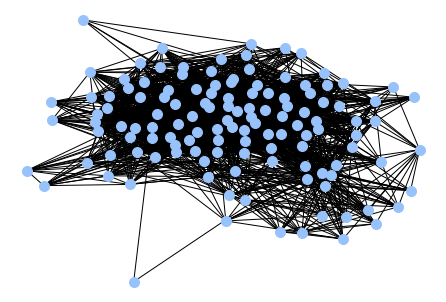

[((1, '1'), (0, '2')), ((1, '1'), (0, '3')), ((1, '1'), (0, '4')), ((1, '1'), (0, '5')), ((1, '1'), (0, '6')), ((1, '1'), (0, '7')), ((1, '1'), (0, '8')), ((1, '1'), (0, '9')), ((1, '1'), (1, '1')), ((1, '1'), (1, '11')), ((1, '1'), (1, '115')), ((1, '1'), (0, '13')), ((1, '1'), (0, '14')), ((1, '1'), (0, '15')), ((1, '1'), (0, '16')), ((1, '1'), (0, '17')), ((1, '1'), (0, '19')), ((1, '1'), (0, '20')), ((1, '1'), (0, '82')), ((1, '1'), (0, '83')), ((1, '1'), (1, '100')), ((1, '1'), (0, '31')), ((1, '1'), (0, '42')), ((1, '1'), (1, '118')), ((1, '1'), (0, '124')), ((1, '1'), (0, '127')), ((1, '1'), (0, '128')), ((1, '1'), (1, '105')), ((1, '1'), (0, '56')), ((1, '1'), (0, '58')), ((1, '1'), (0, '59')), ((1, '1'), (0, '60')), ((1, '1'), (0, '61')), ((1, '1'), (0, '62')), ((1, '1'), (0, '63')), ((1, '1'), (0, '64')), ((1, '1'), (0, '68')), ((1, '1'), (1, '121')), ((1, '1'), (0, '86')), ((1, '1'), (0, '24')), ((1, '1'), (0, '25')), ((1, '1'), (0, '26')), ((1, '1'), (0, '27')), ((1, '1'), 

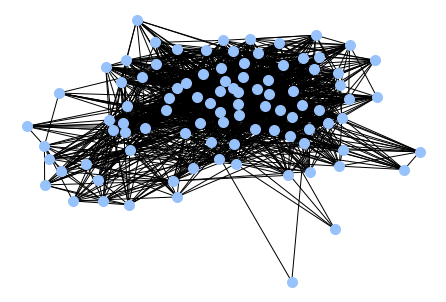

[((2, '1'), (0, '2')), ((2, '1'), (0, '3')), ((2, '1'), (0, '4')), ((2, '1'), (0, '5')), ((2, '1'), (0, '6')), ((2, '1'), (0, '7')), ((2, '1'), (0, '8')), ((2, '1'), (0, '9')), ((2, '1'), (2, '1')), ((2, '1'), (1, '11')), ((2, '1'), (1, '115')), ((2, '1'), (0, '13')), ((2, '1'), (0, '14')), ((2, '1'), (0, '16')), ((2, '1'), (0, '17')), ((2, '1'), (0, '19')), ((2, '1'), (0, '20')), ((2, '1'), (0, '82')), ((2, '1'), (0, '83')), ((2, '1'), (2, '100')), ((2, '1'), (0, '31')), ((2, '1'), (0, '42')), ((2, '1'), (1, '118')), ((2, '1'), (1, '127')), ((2, '1'), (0, '128')), ((2, '1'), (1, '105')), ((2, '1'), (0, '56')), ((2, '1'), (0, '58')), ((2, '1'), (0, '59')), ((2, '1'), (0, '60')), ((2, '1'), (0, '61')), ((2, '1'), (0, '62')), ((2, '1'), (0, '63')), ((2, '1'), (0, '64')), ((2, '1'), (1, '125')), ((2, '1'), (1, '121')), ((2, '1'), (0, '86')), ((2, '1'), (0, '24')), ((2, '1'), (0, '25')), ((2, '1'), (0, '26')), ((2, '1'), (0, '27')), ((2, '1'), (1, '119')), ((2, '1'), (0, '91')), ((2, '1'),

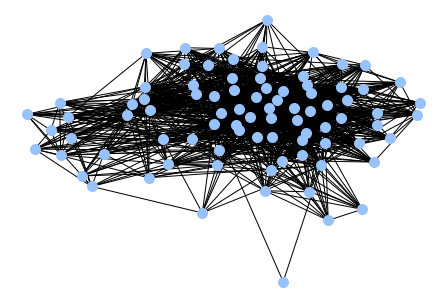

[((3, '1'), (0, '2')), ((3, '1'), (0, '3')), ((3, '1'), (0, '4')), ((3, '1'), (0, '5')), ((3, '1'), (0, '6')), ((3, '1'), (0, '7')), ((3, '1'), (0, '8')), ((3, '1'), (0, '9')), ((3, '1'), (3, '1')), ((3, '1'), (1, '11')), ((3, '1'), (1, '115')), ((3, '1'), (0, '14')), ((3, '1'), (0, '16')), ((3, '1'), (0, '17')), ((3, '1'), (0, '19')), ((3, '1'), (0, '20')), ((3, '1'), (0, '82')), ((3, '1'), (0, '83')), ((3, '1'), (2, '100')), ((3, '1'), (0, '31')), ((3, '1'), (0, '42')), ((3, '1'), (1, '118')), ((3, '1'), (1, '127')), ((3, '1'), (1, '105')), ((3, '1'), (0, '56')), ((3, '1'), (0, '58')), ((3, '1'), (0, '59')), ((3, '1'), (0, '60')), ((3, '1'), (0, '61')), ((3, '1'), (0, '62')), ((3, '1'), (0, '63')), ((3, '1'), (0, '64')), ((3, '1'), (1, '125')), ((3, '1'), (1, '121')), ((3, '1'), (0, '86')), ((3, '1'), (0, '24')), ((3, '1'), (0, '25')), ((3, '1'), (0, '26')), ((3, '1'), (0, '27')), ((3, '1'), (1, '119')), ((3, '1'), (0, '91')), ((3, '1'), (1, '103')), ((3, '1'), (0, '32')), ((3, '1'),

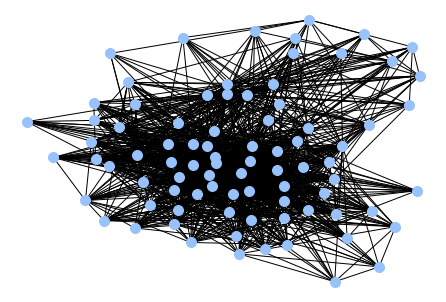

[((4, '1'), (4, '113')), ((4, '1'), (3, '3')), ((4, '1'), (4, '100')), ((4, '1'), (4, '1')), ((4, '113'), (4, '113')), ((4, '113'), (4, '100')), ((4, '113'), (3, '3')), ((3, '3'), (4, '100')), ((3, '3'), (3, '3')), ((4, '100'), (4, '100'))]


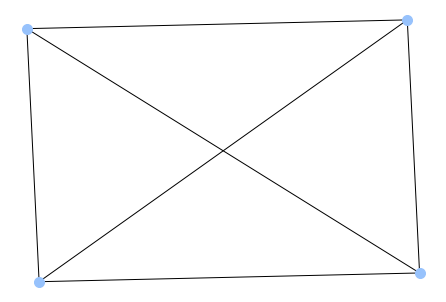

[((5, '1'), (4, '113')), ((5, '1'), (5, '1')), ((4, '113'), (4, '113'))]


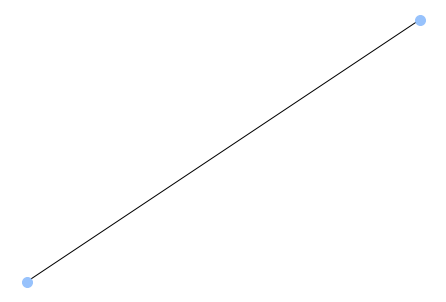

In [29]:
for i in archi2:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    #nx.draw(GG)
    nx.draw(GG, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')
    plt.pause(1)
    plt.show()

In [30]:
print("Rete 2: ", nodes_decrease(num_nodi2))

Rete 2:  (126, 98.4375, 2, 1.5625)


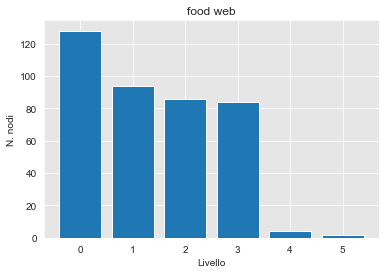

In [4]:
livelli=  [0, 1, 2, 3, 4, 5] 
nnodi=  [128, 94, 86, 84, 4, 2] 

plt.bar(livelli, nnodi)
plt.xlabel("Livello")
plt.ylabel("N. nodi")

plt.title("food web")
plt.savefig("livelliC3G2.png")

In [ ]:
G_prova = nx.Graph()
G_prova.add_edges_from(prova)
nx.draw(G_prova, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')

## Rete 2 inversa

In [16]:
m2 = multicoll(G2, motif)
m2



IndexError: string index out of range

In [ ]:
mapping2 = memo(m2, 3)

G2_finale = 

G2_INV = inverti(G2_finale, mapping2)


nx.draw(G2_INV, node_color='#97C2FC', node_size=150, edge_color='black', node_shape='o')

***

# Rete 3

In [18]:
start_time = time.time()
res3 = multicoll(G3, motif)
print("--- %s seconds ---" % (time.time() - start_time))

{(0, '1'): (1, '1'), (0, '10'): (1, '1'), (0, '11'): (1, '1'), (0, '12'): (0, '12'), (0, '13'): (0, '13'), (0, '14'): (0, '14'), (0, '15'): (0, '15'), (0, '16'): (0, '16'), (0, '17'): (0, '17'), (0, '18'): (0, '18'), (0, '19'): (0, '19'), (0, '2'): (0, '2'), (0, '20'): (0, '20'), (0, '21'): (0, '21'), (0, '22'): (0, '22'), (0, '23'): (0, '23'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '27'): (0, '27'), (0, '28'): (0, '28'), (0, '29'): (0, '29'), (0, '3'): (0, '3'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '32'): (0, '32'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '37'): (0, '37'), (0, '38'): (0, '38'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (0, '42'), (0, '43'): (0, '43'), (0, '44'): (0, '44'), (0, '45'): (0, '45'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'),

{(1, '1'): (1, '1'), (1, '12'): (1, '12'), (1, '13'): (1, '13'), (1, '15'): (1, '15'), (1, '17'): (1, '17'), (1, '20'): (1, '20'), (0, '21'): (1, '21'), (0, '22'): (0, '22'), (0, '24'): (0, '24'), (0, '25'): (0, '25'), (0, '26'): (0, '26'), (0, '28'): (0, '28'), (0, '29'): (0, '29'), (0, '3'): (1, '21'), (0, '30'): (0, '30'), (0, '31'): (0, '31'), (0, '33'): (0, '33'), (0, '34'): (0, '34'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '37'): (0, '37'), (0, '38'): (0, '38'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '42'): (1, '21'), (0, '43'): (0, '43'), (0, '44'): (0, '44'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '51'): (0, '51'), (0, '52'): (0, '52'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '55'): (0, '55'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '58'), (0, '59'): (0, '59'), (0, '6'): (0, '6'), (0, '60'): (0, '60

{(2, '1'): (2, '1'), (2, '12'): (2, '12'), (1, '13'): (2, '13'), (1, '15'): (2, '13'), (1, '17'): (1, '17'), (1, '20'): (1, '20'), (1, '21'): (1, '21'), (1, '22'): (1, '22'), (1, '24'): (1, '24'), (1, '25'): (1, '25'), (1, '26'): (1, '26'), (1, '29'): (1, '29'), (0, '31'): (2, '13'), (0, '35'): (0, '35'), (0, '36'): (0, '36'), (0, '37'): (0, '37'), (0, '39'): (0, '39'), (0, '4'): (0, '4'), (0, '40'): (0, '40'), (0, '41'): (0, '41'), (0, '44'): (0, '44'), (0, '46'): (0, '46'), (0, '47'): (0, '47'), (0, '48'): (0, '48'), (0, '49'): (0, '49'), (0, '5'): (0, '5'), (0, '50'): (0, '50'), (0, '53'): (0, '53'), (0, '54'): (0, '54'), (0, '55'): (0, '55'), (0, '56'): (0, '56'), (0, '57'): (0, '57'), (0, '58'): (0, '58'), (0, '59'): (0, '59'), (0, '6'): (0, '6'), (0, '60'): (0, '60'), (0, '61'): (0, '61'), (0, '62'): (0, '62'), (0, '63'): (0, '63'), (0, '67'): (0, '67'), (0, '9'): (0, '9')}
{(2, '1'): (2, '1'), (2, '12'): (2, '12'), (2, '13'): (2, '13'), (1, '17'): (1, '17'), (1, '20'): (1, '20')

{(3, '1'): (3, '1'), (2, '12'): (2, '12'), (2, '13'): (3, '13'), (1, '17'): (1, '17'), (2, '20'): (2, '20'), (3, '21'): (3, '21'), (1, '22'): (1, '22'), (2, '24'): (3, '13'), (2, '25'): (2, '25'), (2, '26'): (2, '26'), (2, '29'): (2, '29'), (2, '35'): (2, '35'), (1, '40'): (1, '40'), (0, '60'): (3, '13'), (0, '62'): (0, '62')}
{(3, '1'): (3, '1'), (2, '12'): (3, '12'), (3, '13'): (3, '13'), (1, '17'): (1, '17'), (2, '20'): (2, '20'), (3, '21'): (3, '21'), (1, '22'): (1, '22'), (2, '25'): (3, '12'), (2, '26'): (2, '26'), (2, '29'): (2, '29'), (2, '35'): (2, '35'), (1, '40'): (1, '40'), (0, '62'): (3, '12')}
{(3, '1'): (3, '1'), (3, '12'): (3, '12'), (3, '13'): (3, '13'), (1, '17'): (2, '17'), (2, '20'): (2, '20'), (3, '21'): (3, '21'), (1, '22'): (2, '17'), (2, '26'): (2, '26'), (2, '29'): (2, '29'), (2, '35'): (2, '35'), (1, '40'): (2, '17')}
{(3, '1'): (3, '1'), (3, '12'): (3, '12'), (3, '13'): (3, '13'), (2, '17'): (3, '17'), (2, '20'): (3, '17'), (3, '21'): (3, '21'), (2, '26'): (3,

In [19]:
res3

[(0,
  (69,
   [(0, '1'),
    (0, '10'),
    (0, '11'),
    (0, '12'),
    (0, '13'),
    (0, '14'),
    (0, '15'),
    (0, '16'),
    (0, '17'),
    (0, '18'),
    (0, '19'),
    (0, '2'),
    (0, '20'),
    (0, '21'),
    (0, '22'),
    (0, '23'),
    (0, '24'),
    (0, '25'),
    (0, '26'),
    (0, '27'),
    (0, '28'),
    (0, '29'),
    (0, '3'),
    (0, '30'),
    (0, '31'),
    (0, '32'),
    (0, '33'),
    (0, '34'),
    (0, '35'),
    (0, '36'),
    (0, '37'),
    (0, '38'),
    (0, '39'),
    (0, '4'),
    (0, '40'),
    (0, '41'),
    (0, '42'),
    (0, '43'),
    (0, '44'),
    (0, '45'),
    (0, '46'),
    (0, '47'),
    (0, '48'),
    (0, '49'),
    (0, '5'),
    (0, '50'),
    (0, '51'),
    (0, '52'),
    (0, '53'),
    (0, '54'),
    (0, '55'),
    (0, '56'),
    (0, '57'),
    (0, '58'),
    (0, '59'),
    (0, '6'),
    (0, '60'),
    (0, '61'),
    (0, '62'),
    (0, '63'),
    (0, '64'),
    (0, '65'),
    (0, '66'),
    (0, '67'),
    (0, '68'),
    (0, '69'),
    

In [20]:
livello3, num_nodi3, nodi3, archi3 = [], [], [], []
for i in res3:
    livello3.append(i[0])
    num_nodi3.append(i[1][0])
    nodi3.append(i[1][1])
    archi3.append(i[1][2])

print("Livello: ", livello3, "\n# nodi: ", num_nodi3,
      "\nNodi: ", nodi3, "\nArchi: ", archi3, "\n\n")

Livello:  [0, 1, 2, 3, 4, 5] 
# nodi:  [69, 47, 21, 7, 3, 1] 
Nodi:  [[(0, '1'), (0, '10'), (0, '11'), (0, '12'), (0, '13'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '60'), (0, '61'), (0, '62'), (0, '63'), (0, '64'), (0, '65'), (0, '66'), (0, '67'), (0, '68'), (0, '69'), (0, '7'), (0, '8'), (0, '9')], [(1, '1'), (1, '12'), (1, '13'), (1, '15'), (1, '17'), (1, '20'), (1, '21'), (1, '22'), (1, '24'), (1, '25'), (1, '26'), (0, '28'), (0, '29'), (0, '30'), (0, '31'), (0, '35'), (0

In [21]:
for i in res3:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\n\n")

Livello:  0 
# nodi:  69 
Nodi:  [(0, '1'), (0, '10'), (0, '11'), (0, '12'), (0, '13'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '60'), (0, '61'), (0, '62'), (0, '63'), (0, '64'), (0, '65'), (0, '66'), (0, '67'), (0, '68'), (0, '69'), (0, '7'), (0, '8'), (0, '9')] 


Livello:  1 
# nodi:  47 
Nodi:  [(1, '1'), (1, '12'), (1, '13'), (1, '15'), (1, '17'), (1, '20'), (1, '21'), (1, '22'), (1, '24'), (1, '25'), (1, '26'), (0, '28'), (0, '29'), (0, '30'), (0, '31'), (0, '35'), (0, 

[((0, '67'), (0, '3')), ((0, '67'), (0, '4')), ((0, '67'), (0, '5')), ((0, '67'), (0, '6')), ((0, '67'), (0, '44')), ((0, '3'), (0, '69')), ((0, '3'), (0, '7')), ((0, '3'), (0, '8')), ((0, '3'), (0, '9')), ((0, '3'), (0, '10')), ((0, '3'), (0, '11')), ((0, '3'), (0, '16')), ((0, '3'), (0, '18')), ((0, '3'), (0, '19')), ((0, '3'), (0, '21')), ((0, '3'), (0, '23')), ((0, '3'), (0, '24')), ((0, '3'), (0, '35')), ((0, '3'), (0, '36')), ((0, '3'), (0, '37')), ((0, '3'), (0, '41')), ((0, '3'), (0, '42')), ((0, '3'), (0, '58')), ((0, '3'), (0, '65')), ((0, '3'), (0, '66')), ((0, '4'), (0, '69')), ((0, '4'), (0, '7')), ((0, '4'), (0, '8')), ((0, '4'), (0, '9')), ((0, '4'), (0, '10')), ((0, '4'), (0, '11')), ((0, '4'), (0, '13')), ((0, '4'), (0, '42')), ((0, '4'), (0, '46')), ((0, '4'), (0, '47')), ((0, '4'), (0, '48')), ((0, '4'), (0, '49')), ((0, '4'), (0, '50')), ((0, '4'), (0, '53')), ((0, '4'), (0, '56')), ((0, '4'), (0, '58')), ((0, '4'), (0, '61')), ((0, '4'), (0, '62')), ((0, '4'), (0, 

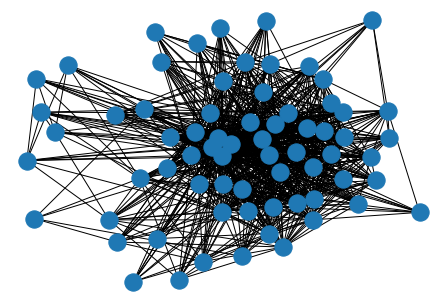

[((0, '67'), (1, '21')), ((0, '67'), (0, '4')), ((0, '67'), (0, '5')), ((0, '67'), (0, '6')), ((0, '67'), (0, '44')), ((1, '21'), (0, '69')), ((1, '21'), (0, '7')), ((1, '21'), (0, '8')), ((1, '21'), (0, '9')), ((1, '21'), (1, '1')), ((1, '21'), (1, '12')), ((1, '21'), (1, '13')), ((1, '21'), (1, '15')), ((1, '21'), (1, '21')), ((1, '21'), (1, '24')), ((1, '21'), (0, '35')), ((1, '21'), (0, '36')), ((1, '21'), (0, '37')), ((1, '21'), (0, '41')), ((1, '21'), (0, '58')), ((1, '21'), (1, '17')), ((1, '21'), (1, '26')), ((1, '21'), (0, '4')), ((1, '21'), (0, '5')), ((1, '21'), (0, '6')), ((1, '21'), (0, '68')), ((1, '21'), (1, '20')), ((1, '21'), (1, '22')), ((1, '21'), (1, '25')), ((1, '21'), (0, '56')), ((1, '21'), (0, '57')), ((1, '21'), (0, '61')), ((1, '21'), (0, '63')), ((1, '21'), (0, '39')), ((1, '21'), (0, '40')), ((1, '21'), (0, '50')), ((1, '21'), (0, '59')), ((0, '4'), (0, '69')), ((0, '4'), (0, '7')), ((0, '4'), (0, '8')), ((0, '4'), (0, '9')), ((0, '4'), (1, '1')), ((0, '4'),

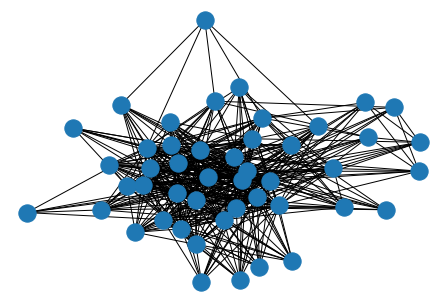

[((0, '67'), (2, '21')), ((0, '67'), (2, '29')), ((0, '67'), (0, '5')), ((0, '67'), (0, '6')), ((0, '67'), (2, '25')), ((2, '21'), (2, '29')), ((2, '21'), (2, '12')), ((2, '21'), (1, '40')), ((2, '21'), (2, '1')), ((2, '21'), (2, '13')), ((2, '21'), (2, '21')), ((2, '21'), (2, '24')), ((2, '21'), (1, '35')), ((2, '21'), (2, '26')), ((2, '21'), (1, '17')), ((2, '21'), (0, '5')), ((2, '21'), (0, '6')), ((2, '21'), (2, '20')), ((2, '21'), (1, '22')), ((2, '21'), (2, '25')), ((2, '21'), (1, '39')), ((2, '21'), (0, '59')), ((2, '29'), (2, '29')), ((2, '29'), (2, '12')), ((2, '29'), (1, '40')), ((2, '29'), (2, '1')), ((2, '29'), (2, '13')), ((2, '29'), (2, '24')), ((2, '29'), (2, '20')), ((2, '29'), (1, '39')), ((2, '29'), (2, '25')), ((2, '29'), (0, '53')), ((2, '29'), (1, '35')), ((2, '29'), (0, '62')), ((2, '29'), (1, '17')), ((2, '29'), (2, '26')), ((2, '29'), (0, '5')), ((2, '29'), (0, '6')), ((2, '29'), (1, '22')), ((2, '29'), (0, '59')), ((2, '29'), (0, '60')), ((0, '5'), (2, '12')), 

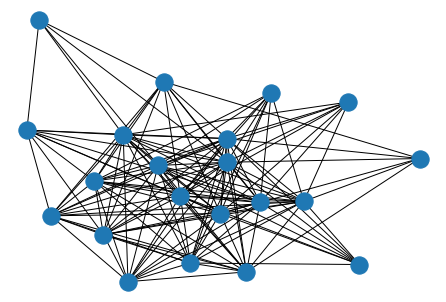

[((3, '21'), (3, '21')), ((3, '21'), (2, '29')), ((3, '21'), (3, '1')), ((3, '21'), (3, '12')), ((3, '21'), (3, '17')), ((3, '21'), (3, '13')), ((3, '21'), (2, '35')), ((2, '29'), (2, '29')), ((2, '29'), (3, '12')), ((2, '29'), (3, '17')), ((2, '29'), (3, '1')), ((2, '29'), (3, '13')), ((2, '29'), (2, '35')), ((3, '1'), (3, '12')), ((3, '1'), (3, '17')), ((3, '1'), (3, '1')), ((3, '1'), (2, '35')), ((3, '1'), (3, '13')), ((3, '12'), (3, '13')), ((3, '12'), (3, '12')), ((3, '12'), (3, '17')), ((3, '12'), (2, '35')), ((3, '17'), (3, '17')), ((3, '17'), (3, '13')), ((3, '17'), (2, '35')), ((3, '13'), (3, '13')), ((3, '13'), (2, '35')), ((2, '35'), (2, '35'))]


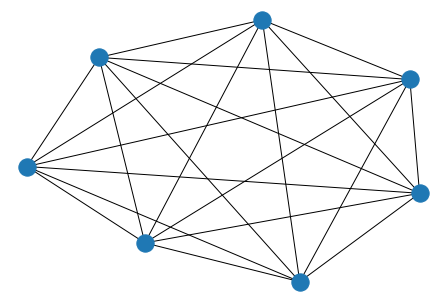

[((3, '21'), (3, '21')), ((3, '21'), (4, '1')), ((3, '21'), (4, '12')), ((4, '1'), (4, '1')), ((4, '1'), (4, '12')), ((4, '12'), (4, '12'))]


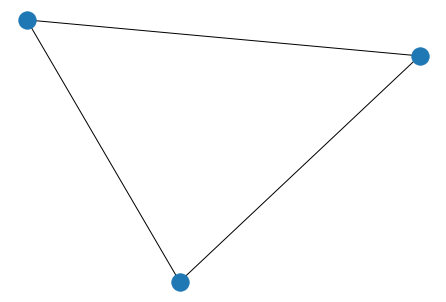

[((5, '1'), (5, '1'))]


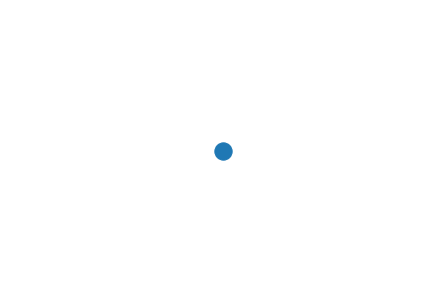

In [22]:
for i in archi3:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

[((0, '67'), (0, '3')), ((0, '67'), (0, '4')), ((0, '67'), (0, '5')), ((0, '67'), (0, '6')), ((0, '67'), (0, '44')), ((0, '3'), (0, '69')), ((0, '3'), (0, '7')), ((0, '3'), (0, '8')), ((0, '3'), (0, '9')), ((0, '3'), (0, '10')), ((0, '3'), (0, '11')), ((0, '3'), (0, '16')), ((0, '3'), (0, '18')), ((0, '3'), (0, '19')), ((0, '3'), (0, '21')), ((0, '3'), (0, '23')), ((0, '3'), (0, '24')), ((0, '3'), (0, '35')), ((0, '3'), (0, '36')), ((0, '3'), (0, '37')), ((0, '3'), (0, '41')), ((0, '3'), (0, '42')), ((0, '3'), (0, '58')), ((0, '3'), (0, '65')), ((0, '3'), (0, '66')), ((0, '4'), (0, '69')), ((0, '4'), (0, '7')), ((0, '4'), (0, '8')), ((0, '4'), (0, '9')), ((0, '4'), (0, '10')), ((0, '4'), (0, '11')), ((0, '4'), (0, '13')), ((0, '4'), (0, '42')), ((0, '4'), (0, '46')), ((0, '4'), (0, '47')), ((0, '4'), (0, '48')), ((0, '4'), (0, '49')), ((0, '4'), (0, '50')), ((0, '4'), (0, '53')), ((0, '4'), (0, '56')), ((0, '4'), (0, '58')), ((0, '4'), (0, '61')), ((0, '4'), (0, '62')), ((0, '4'), (0, 

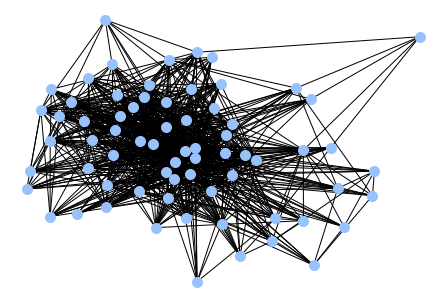

[((0, '67'), (1, '21')), ((0, '67'), (0, '4')), ((0, '67'), (0, '5')), ((0, '67'), (0, '6')), ((0, '67'), (0, '44')), ((1, '21'), (0, '69')), ((1, '21'), (0, '7')), ((1, '21'), (0, '8')), ((1, '21'), (0, '9')), ((1, '21'), (1, '1')), ((1, '21'), (1, '12')), ((1, '21'), (1, '13')), ((1, '21'), (1, '15')), ((1, '21'), (1, '21')), ((1, '21'), (1, '24')), ((1, '21'), (0, '35')), ((1, '21'), (0, '36')), ((1, '21'), (0, '37')), ((1, '21'), (0, '41')), ((1, '21'), (0, '58')), ((1, '21'), (1, '17')), ((1, '21'), (1, '26')), ((1, '21'), (0, '4')), ((1, '21'), (0, '5')), ((1, '21'), (0, '6')), ((1, '21'), (0, '68')), ((1, '21'), (1, '20')), ((1, '21'), (1, '22')), ((1, '21'), (1, '25')), ((1, '21'), (0, '56')), ((1, '21'), (0, '57')), ((1, '21'), (0, '61')), ((1, '21'), (0, '63')), ((1, '21'), (0, '39')), ((1, '21'), (0, '40')), ((1, '21'), (0, '50')), ((1, '21'), (0, '59')), ((0, '4'), (0, '69')), ((0, '4'), (0, '7')), ((0, '4'), (0, '8')), ((0, '4'), (0, '9')), ((0, '4'), (1, '1')), ((0, '4'),

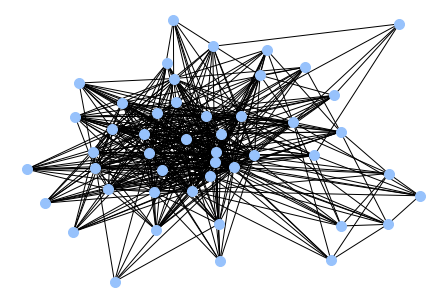

[((0, '67'), (2, '21')), ((0, '67'), (2, '29')), ((0, '67'), (0, '5')), ((0, '67'), (0, '6')), ((0, '67'), (2, '25')), ((2, '21'), (2, '29')), ((2, '21'), (2, '12')), ((2, '21'), (1, '40')), ((2, '21'), (2, '1')), ((2, '21'), (2, '13')), ((2, '21'), (2, '21')), ((2, '21'), (2, '24')), ((2, '21'), (1, '35')), ((2, '21'), (2, '26')), ((2, '21'), (1, '17')), ((2, '21'), (0, '5')), ((2, '21'), (0, '6')), ((2, '21'), (2, '20')), ((2, '21'), (1, '22')), ((2, '21'), (2, '25')), ((2, '21'), (1, '39')), ((2, '21'), (0, '59')), ((2, '29'), (2, '29')), ((2, '29'), (2, '12')), ((2, '29'), (1, '40')), ((2, '29'), (2, '1')), ((2, '29'), (2, '13')), ((2, '29'), (2, '24')), ((2, '29'), (2, '20')), ((2, '29'), (1, '39')), ((2, '29'), (2, '25')), ((2, '29'), (0, '53')), ((2, '29'), (1, '35')), ((2, '29'), (0, '62')), ((2, '29'), (1, '17')), ((2, '29'), (2, '26')), ((2, '29'), (0, '5')), ((2, '29'), (0, '6')), ((2, '29'), (1, '22')), ((2, '29'), (0, '59')), ((2, '29'), (0, '60')), ((0, '5'), (2, '12')), 

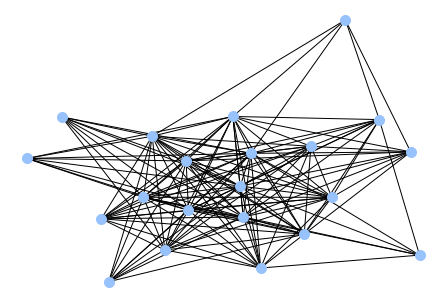

[((3, '21'), (3, '21')), ((3, '21'), (2, '29')), ((3, '21'), (3, '1')), ((3, '21'), (3, '12')), ((3, '21'), (3, '17')), ((3, '21'), (3, '13')), ((3, '21'), (2, '35')), ((2, '29'), (2, '29')), ((2, '29'), (3, '12')), ((2, '29'), (3, '17')), ((2, '29'), (3, '1')), ((2, '29'), (3, '13')), ((2, '29'), (2, '35')), ((3, '1'), (3, '12')), ((3, '1'), (3, '17')), ((3, '1'), (3, '1')), ((3, '1'), (2, '35')), ((3, '1'), (3, '13')), ((3, '12'), (3, '13')), ((3, '12'), (3, '12')), ((3, '12'), (3, '17')), ((3, '12'), (2, '35')), ((3, '17'), (3, '17')), ((3, '17'), (3, '13')), ((3, '17'), (2, '35')), ((3, '13'), (3, '13')), ((3, '13'), (2, '35')), ((2, '35'), (2, '35'))]


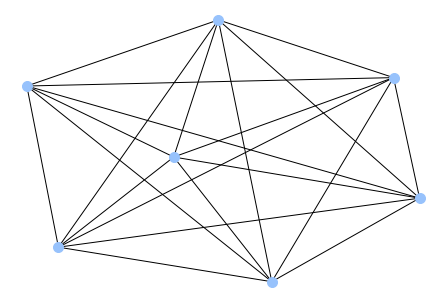

[((3, '21'), (3, '21')), ((3, '21'), (4, '1')), ((3, '21'), (4, '12')), ((4, '1'), (4, '1')), ((4, '1'), (4, '12')), ((4, '12'), (4, '12'))]


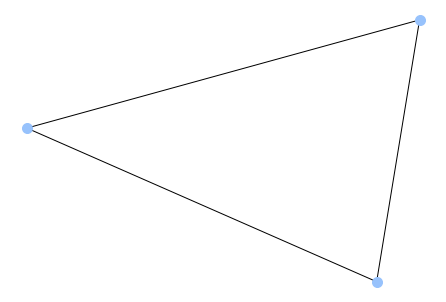

[((5, '1'), (5, '1'))]


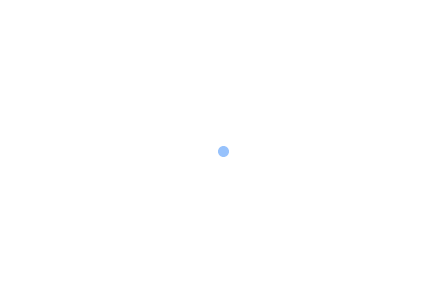

In [23]:
for i in archi3:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    #nx.draw(GG)
    nx.draw(GG, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')
    plt.pause(1)
    plt.show()

In [24]:
print("Rete 3: ", nodes_decrease(num_nodi3))

Rete 3:  (68, 98.55072463768117, 1, 1.4492753623188293)


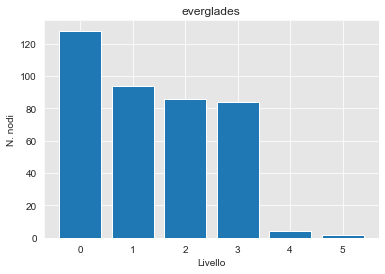

In [5]:
Livello = [0, 1, 2, 3, 4, 5] 
Nnodi = [69, 47, 21, 7, 3, 1] 

plt.bar(livelli, nnodi)
plt.xlabel("Livello")
plt.ylabel("N. nodi")

plt.title("everglades")
plt.savefig("livelliC3G3.png")

## Rete 3 inversa

In [17]:
m3 = multicoll(G3, motif)
m3



IndexError: string index out of range

In [ ]:
mapping3 = memo(m3, 3)

G3_finale = 

G3_INV = inverti(G3_finale, mapping3)


nx.draw(G3_INV, node_color='#97C2FC', node_size=150, edge_color='black', node_shape='o')

### Procedura frattale

[torna su](#Indice)

Comprimi **solo se** il livello è uguale all'interno del motif

si potrebbe trovare una legge di multipli per sapere già i nodi comprimibili (?)

compressione di strutture di nodi indipendenti

all'iterazione successiva comprimo su ciò che è già stato compresso

In [30]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

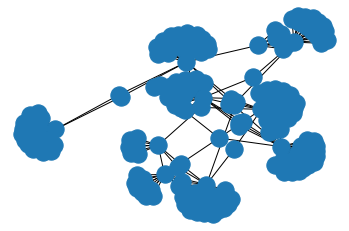

In [31]:
filename = 'bn-mouse_visual-cortex_2.edges'
G = nx.read_edgelist(filename)

nx.draw_networkx(G, with_labels=False)
plt.axis('off')
plt.show()

In [32]:
G = rinomina(G0)

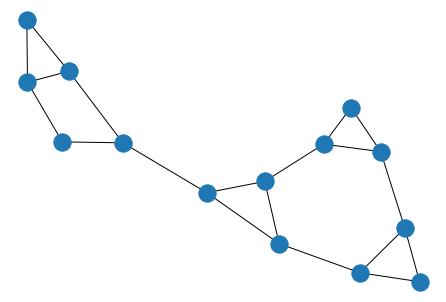

In [91]:
G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4), (4, 5), (5, 6), (4, 6),
                   (6, 8), (7, 8), (7, 9), (8, 9), (3, 7), (5, 14), (14, 10),
                   (14, 13), (10, 11), (11, 12), (10, 12), (12, 13)])
nx.draw(G0)

G = rinomina(G0)

In [32]:
def all_equal(iterator):
    iterator = [x[0] for x in iterator]
    return len(set(iterator)) <= 1

In [33]:
def frattale(G, motif):
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    #ris = identify(motif, G)
    liv = 0
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
            
        ris = identify(motif, G)
        print(nodi, "\n\n", ris, "\n\n")
        for i in ris:
            print(i, all_equal(i))
            if all_equal(i) == True:
                mapping = zippa(ris, nodi)
                G = nx.relabel_nodes(G, mapping)
                print(mapping)
            ris = ris[1:]
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv+=1
            print(n)
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res



In [34]:
risultato = frattale(G2, motif)

[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '

TypeError: 'NoneType' object is not callable

In [29]:
risultato = frattale(G, motif)

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[(0, (0, '1')), (0, (0, '12')), (0, (0, '4'))] True
[[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), 

In [37]:
res = frattale(G2, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '13'), (0, '130'), (0, '131'), (0, '14'), (0, '15'), (0, '16'), (0, '17'), (0, '18'), (0, '19'), (0, '2'), (0, '20'), (0, '21'), (0, '22'), (0, '23'), (0, '24'), (0, '25'), (0, '26'), (0, '27'), (0, '28'), (0, '29'), (0, '3'), (0, '30'), (0, '31'), (0, '32'), (0, '33'), (0, '34'), (0, '35'), (0, '36'), (0, '37'), (0, '38'), (0, '39'), (0, '4'), (0, '40'), (0, '41'), (0, '42'), (0, '43'), (0, '44'), (0, '45'), (0, '46'), (0, '47'), (0, '48'), (0, '49'), (0, '5'), (0, '50'), (0, '51'), (0, '52'), (0, '53'), (0, '54'), (0, '55'), (0, '56'), (0, '57'), (0, '58'), (0, '59'), (0, '6'), (0, '

TypeError: 'NoneType' object is not callable

In [38]:
nodi

[]

In [39]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

In [20]:
risultato

NameError: name 'risultato' is not defined

In [ ]:
    if ris == []:
            print("fine")
            return
    while all_equal(ris[0]) == True:
        
        if all_equal(ris[0]) == False:
            #print("AOOOOO")
            ris = ris[1:]
            
        else: #if all_equal(ris[0]) == True:
            print(ris[0], all_equal(ris[0]))
            #if all_equal(ris[0]) == True:
                
            
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]                
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1
            #print(liv)
            
            """
    ris = identify(motif, G)
    print("\n\n", nodi, "\n\n", ris, "\n\n")
    for i in ris:
        print(i, all_equal(i))
        if all_equal(i) == True:
            print("yee")
            mapping = zippa(ris, nodi)
            G = nx.relabel_nodes(G, mapping)
            print(mapping)
        ris = ris[1:]
        nodi = list(G.nodes())
        nodi.sort(key=lambda x:x[1])
        archi = list(G.edges())
        n.append(nodi)
        a.append(archi)
        print(n)"""
    
    #return ris
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res
risultato = frattale(G, motif)

In [35]:
res = risultato

NameError: name 'risultato' is not defined

In [21]:
res = frattale(G, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

TypeError: 'NoneType' object is not callable

In [56]:
nodi

[[(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10),
  (0, 11),
  (0, 12),
  (0, 13),
  (0, 14)],
 [(1, 1), (1, 4), (1, 7), (1, 10), (0, 13), (0, 14)]]

[((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 3), (0, 7)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6)), ((0, 5), (0, 14)), ((0, 6), (0, 8)), ((0, 8), (0, 7)), ((0, 8), (0, 9)), ((0, 7), (0, 9)), ((0, 14), (0, 10)), ((0, 14), (0, 13)), ((0, 10), (0, 11)), ((0, 10), (0, 12)), ((0, 13), (0, 12)), ((0, 11), (0, 12))]


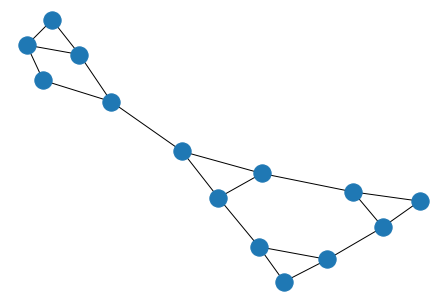

[((1, 1), (1, 1)), ((1, 1), (1, 4)), ((1, 1), (1, 7)), ((1, 4), (1, 4)), ((1, 4), (0, 14)), ((1, 4), (1, 7)), ((1, 7), (1, 7)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


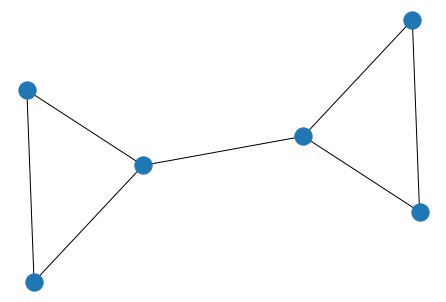

[((2, 1), (2, 1)), ((2, 1), (0, 14)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


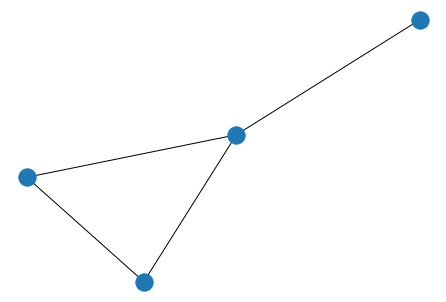

In [134]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---
### Memorizza merge
[torna su](#Indice)

Memorizza merge, per poter ricostruire inversamente

Ora funziona con il primo mapping, da rendere iterabile

In [113]:
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])
ris = identify(motif, G)
mapping = zippa(ris, nodi)
m = zippa(ris, nodi)

In [114]:
# Memorizza [(0, 1), (0, 7), (0, 8)] = (1, 1)
m

{(0, 1): (1, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (1, 1),
 (0, 8): (1, 1)}

In [115]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, 1): [(0, 1), (0, 7), (0, 8)]}

***

### Indici
[torna su](#Indice)

**Nodi compressi e nodi mantenuti, count e %**

In [116]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(4, 50.0, 4, 50.0)

#### Statistiche per livello

In [117]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  8 
Nodi:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)] 
Archi:  [((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))] 


Livello:  1 
# nodi:  4 
Nodi:  [(1, 1), (1, 2), (0, 3), (0, 6)] 
Archi:  [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))] 


